In [1]:
import pandas as pd
import networkx as nx
import warnings
from operator import itemgetter
from networkx.algorithms import degree_centrality

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as npatches
import seaborn as sns
from node2vec import Node2Vec
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('C:/Akademik/Semester 8/Teknologi Web/datasetfp_cleaning.csv')

In [4]:
g = nx.from_pandas_edgelist(df, source='pemain', target='judul_sinetron')

df2 = df[['sutradara', 'judul_sinetron']].drop_duplicates()
    
mylist = df2.values.tolist()

In [6]:
g.add_edges_from(mylist, weight=1, label='sutradara')

labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


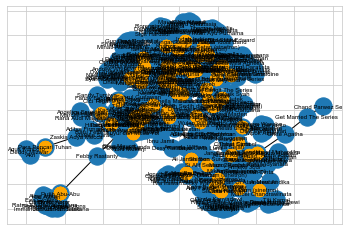

In [7]:
fig, ax = plt.subplots()
layout = nx.spring_layout(g, iterations=50)
nx.draw_networkx_nodes(g, layout, ax=ax, labels=True)
nx.draw_networkx_edges(g, layout, ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax, font_size=6)

pemainpopuler = [person for person in df.judul_sinetron if g.degree(person)>3]
nx.draw_networkx_nodes(g, layout, nodelist=pemainpopuler, node_color='orange', node_size=150)

In [9]:
density = nx.density(g)
density

0.007895920441105429

In [40]:
dc = degree_centrality(g)
new_dc = degree_centrality(g)
unique_sutradara = list(np.unique(df.sutradara.values))
for i in dc.keys():
    if i not in unique_sutradara:
        new_dc.pop(i)

In [41]:
new_dc = pd.DataFrame({'Sutradara': list(new_dc.keys()), 'Weight': list(new_dc.values())})

In [50]:
new_dc.sort_values('Weight', axis=0, ascending=False)

,Sutradara,Weight
1,Leo Sutanto,0.121387
2,Manoj Punjabi,0.060694
3,Raam Punjabi,0.034682
0,Deddy Mizwar,0.002890
4,Chand Parwez Servia,0.002890
5,Screenplay Productions,0.002890
